ИУ5-21М Мелконьянц 10 Вариант

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
import sklearn.preprocessing
%matplotlib inline 
sns.set(style="ticks")

In [28]:
data=pd.read_csv("C:/Users/melko/Desktop/ММО/artists.csv")

Для студентов групп ИУ5-21М, ИУ5И-21М, ИУ5Ц-21М - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

Text(0, 0.5, 'Birth Year')

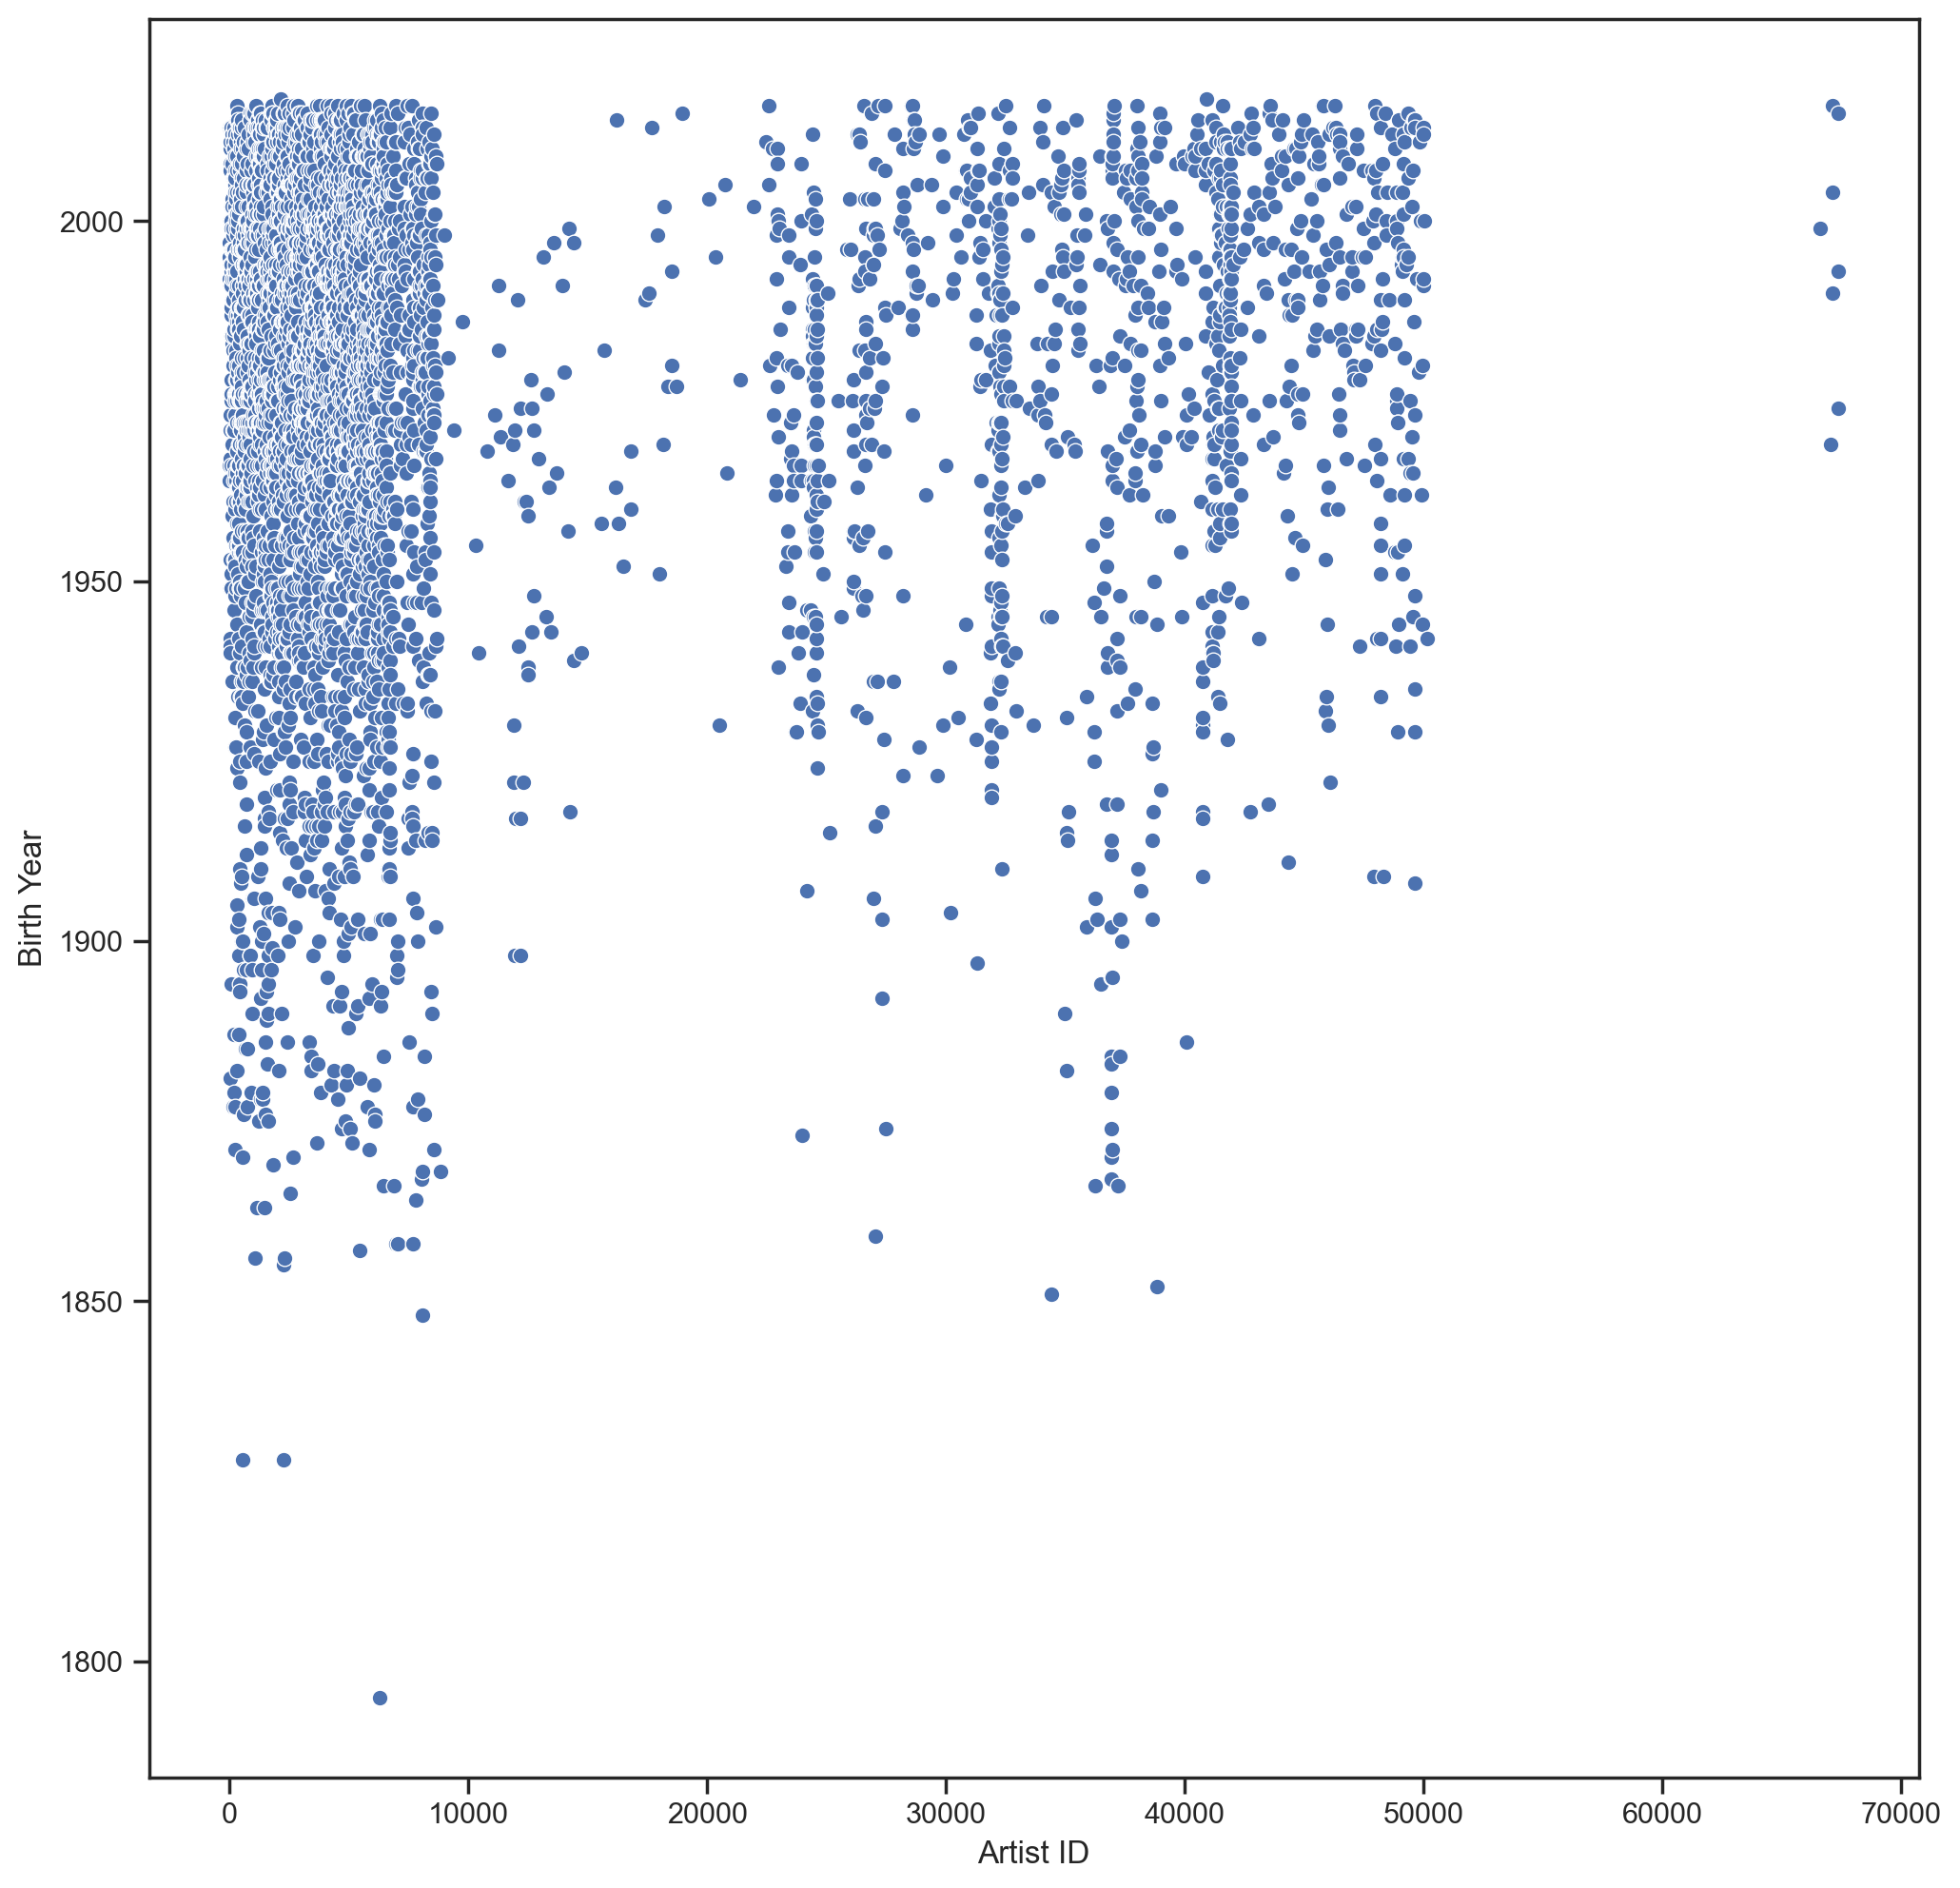

In [56]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.scatterplot(ax=ax, x='Artist ID', y='Birth Year', data=data)
plt.xlabel('Artist ID')
plt.ylabel('Birth Year')

Задача №10.
Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения наиболее распространенным значением.

In [29]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\melko\AppData\Local\Temp\ipykernel_33944\2578555594.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [30]:
data.head()

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year
0,1,Robert Arneson,American,Male,1930.0,1992.0
1,2,Doroteo Arnaiz,Spanish,Male,1936.0,NaN
2,3,Bill Arnold,American,Male,1941.0,NaN
3,4,Charles Arnoldi,American,Male,1946.0,NaN
4,5,Per Arnoldi,Danish,Male,1941.0,NaN


In [31]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 15091


In [32]:
# типы колонок
data.dtypes

Artist ID        int64
Name            object
Nationality     object
Gender          object
Birth Year     float64
Death Year     float64
dtype: object

In [33]:
# размер набора данных
data.shape

(15091, 6)

In [34]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Artist ID          0
Name               0
Nationality     2488
Gender          3072
Birth Year      3854
Death Year     10512
dtype: int64

In [35]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((15091, 6), (15091, 2))

In [36]:
data_new_1.columns

Index(['Artist ID', 'Name'], dtype='object')

In [37]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((15091, 6), (4429, 6))

In [38]:
# Найдем пропуски в данных в процентном соотношении
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Artist ID - 0%
Name - 0%
Nationality - 16%
Gender - 20%
Birth Year - 26%
Death Year - 70%


In [39]:
data[data.columns].isnull()

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
15086,False,False,False,False,False,True
15087,False,False,False,False,False,True
15088,False,False,True,True,True,True
15089,False,False,True,False,True,True


<AxesSubplot:>

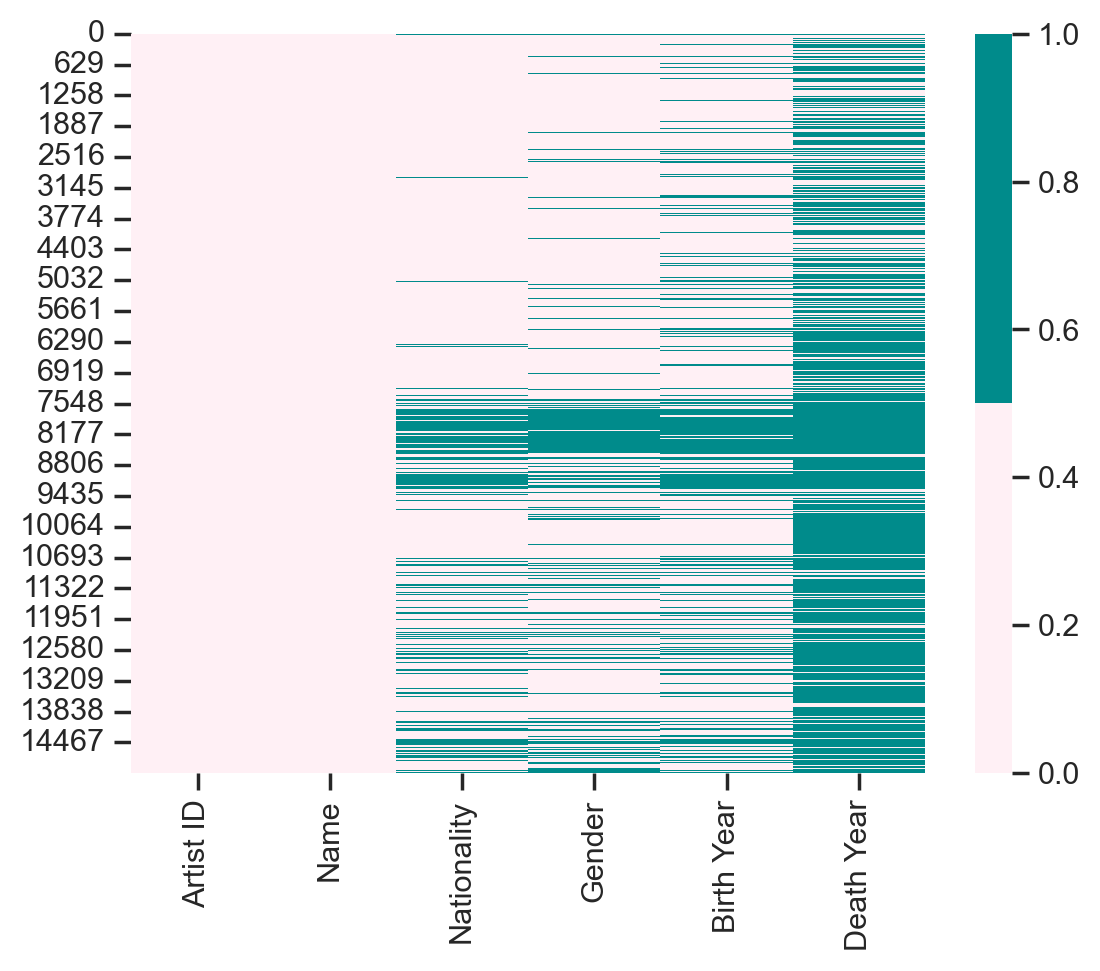

In [40]:
# Поработаем с заполнение пропусков
colors = ['#FFF0F5', '#008B8B']
sns.heatmap(data[data.columns].isnull(), cmap=sns.color_palette(colors))

In [41]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Nationality. Тип данных object. Количество пустых значений 2488, 16.49%.
Колонка Gender. Тип данных object. Количество пустых значений 3072, 20.36%.


In [42]:
cat_temp_data = data[['Nationality']]
cat_temp_data.head()

,Nationality
0,American
1,Spanish
2,American
3,American
4,Danish


In [43]:
cat_temp_data['Nationality'].unique()

array(['American', 'Spanish', 'Danish', 'Italian', 'French', 'Estonian',
       'Mexican', 'Swedish', nan, 'Israeli', 'British', 'Finnish',
       'Polish', 'Japanese', 'Guatemalan', 'Colombian', 'Romanian',
       'Russian', 'German', 'Argentine', 'Kuwaiti', 'Various', 'Belgian',
       'Dutch', 'Norwegian', 'Nationality unknown', 'Chilean', 'Swiss',
       'Costa Rican', 'Czech', 'Brazilian', 'Austrian', 'Canadian',
       'Australian', 'Ukrainian', 'Hungarian', 'Haitian', 'Congolese',
       'Bolivian', 'Cuban', 'Yugoslav', 'Portuguese', 'Indian',
       'Icelandic', 'Irish', 'Guyanese', 'Uruguayan', 'Slovak',
       'Croatian', 'Greek', 'Peruvian', 'Chinese', 'Venezuelan',
       'Turkish', 'Panamanian', 'Algerian', 'Ecuadorian', 'South African',
       'Iranian', 'Korean', 'Canadian Inuit', 'Paraguayan',
       'Luxembourgish', 'Nicaraguan', 'Zimbabwean', 'Moroccan',
       'Tanzanian', 'Bulgarian', 'Tunisian', 'Sudanese', 'Taiwanese',
       'Ethiopian', 'Slovenian', 'Scottish', 

In [44]:
cat_temp_data[cat_temp_data['Nationality'].isnull()]

,Nationality
14,NaN
173,NaN
465,NaN
980,NaN
2002,NaN
...,...
15081,NaN
15083,NaN
15088,NaN
15089,NaN


In [45]:
# Импьютация наиболее частыми значениями
imp2 = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['American'],
       ['Spanish'],
       ['American'],
       ...,
       ['American'],
       ['American'],
       ['American']], dtype=object)

In [46]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Afghan', 'Albanian', 'Algerian', 'American', 'Angolan',
       'Argentine', 'Australian', 'Austrian', 'Azerbaijani', 'Bahamian',
       'Belgian', 'Bolivian', 'Bosnian', 'Brazilian', 'British',
       'Bulgarian', 'Burkinabe', 'Cambodian', 'Cameroonian', 'Canadian',
       'Canadian Inuit', 'Catalan', 'Chilean', 'Chinese', 'Colombian',
       'Congolese', 'Costa Rican', 'Croatian', 'Cuban', 'Cypriot',
       'Czech', 'Czechoslovakian', 'Danish', 'Dutch', 'Ecuadorian',
       'Egyptian', 'Emirati', 'Estonian', 'Ethiopian', 'Filipino',
       'Finnish', 'French', 'Georgian', 'German', 'Ghanaian', 'Greek',
       'Guatemalan', 'Guyanese', 'Haitian', 'Hungarian', 'Icelandic',
       'Indian', 'Indonesian', 'Iranian', 'Iraqi', 'Irish', 'Israeli',
       'Italian', 'Ivorian', 'Japanese', 'Kazakhstani', 'Kenyan',
       'Korean', 'Kuwaiti', 'Kyrgyzstani', 'Latvian', 'Lebanese',
       'Lithuanian', 'Luxembourgish', 'Macedonian', 'Malaysian', 'Malian',
       'Mauritanian', 'Mexican', 

Задача №30.
Для набора данных проведите удаление повторяющихся признаков.

Представим, что в наборе данных Birth Year и Death Year имеют одни и те же значения. Затем воспользуемся drop_duplicates для транспонированного датафрейма для удаления дубликатов, сохраняя первую "колонку". Транспонирование необходимо, так как метод предназначен только для удаления дубликатов-рядов.

In [53]:
data['Birth Year'] = data['Death Year']
print(data.shape)
print(data.columns)
for c in ['Birth Year', 'Death Year']:
    print(f'{c} in columns: {c in data.columns}')

(15091, 6)
Index(['Artist ID', 'Name', 'Nationality', 'Gender', 'Birth Year',
       'Death Year'],
      dtype='object')
Birth Year in columns: True
Death Year in columns: True


In [54]:
data_no_dups = data.transpose().drop_duplicates(keep='first').transpose()
print(data_no_dups.shape)
print(data_no_dups.columns)
for c in ['Birth Year', 'Death Year']:
    print(f'{c} in columns: {c in data_no_dups.columns}')

(15091, 5)
Index(['Artist ID', 'Name', 'Nationality', 'Gender', 'Birth Year'], dtype='object')
Birth Year in columns: True
Death Year in columns: False
